## Imports

In [116]:
import pandas as pd

df = pd.read_csv('Starbucks satisfactory survey_modified.csv')

In [117]:
df.head()

,Timestamp,Gender,Age,Has membership card,Rate the product quality,Rate the price range,Rate the ambiance,Rate the service of staff,Continue to buy?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,1,4,3,5,4,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,1,4,3,4,5,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,1,4,3,4,4,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,0,2,1,3,3,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,0,3,3,2,3,Yes


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  122 non-null    object
 1   Gender                     122 non-null    object
 2   Age                        122 non-null    object
 3   Has membership card        122 non-null    int64 
 4   Rate the product quality   122 non-null    int64 
 5   Rate the price range       122 non-null    int64 
 6   Rate the ambiance          122 non-null    int64 
 7   Rate the service of staff  122 non-null    int64 
 8   Continue to buy?           122 non-null    object
dtypes: int64(5), object(4)
memory usage: 8.7+ KB


## Data Preparation

### Removing unnecessary columns

In [119]:
df = df.drop(columns=['Timestamp','Gender', 'Age'])

### Check for null values

In [120]:
df.isnull().sum()

Has membership card          0
Rate the product quality     0
Rate the price range         0
Rate the ambiance            0
Rate the service of staff    0
Continue to buy?             0
dtype: int64

In [121]:
df['Continue to buy?'].value_counts()

Yes    94
No     28
Name: Continue to buy?, dtype: int64

## Choose feature and target variables

In [122]:
x = df.drop(columns=['Continue to buy?'])

y = df['Continue to buy?']

In [123]:
x.head()

,Has membership card,Rate the product quality,Rate the price range,Rate the ambiance,Rate the service of staff
0,1,4,3,5,4
1,1,4,3,4,5
2,1,4,3,4,4
3,0,2,1,3,3
4,0,3,3,2,3


In [124]:
y.head()

0    Yes
1    Yes
2    Yes
3     No
4    Yes
Name: Continue to buy?, dtype: object

## Split the data into training and testing sets

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 80% training, 20% testing and random seed = 42
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((97, 5), (25, 5), (97,), (25,))

## Encode the variables

In [126]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode the feature variables
X_train = X_train.apply(le.fit_transform)
X_test = X_test.apply(le.fit_transform)

y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [127]:
X_train.head()

,Has membership card,Rate the product quality,Rate the price range,Rate the ambiance,Rate the service of staff
42,1,4,3,4,3
105,0,3,2,3,3
93,1,4,2,4,3
36,0,2,2,3,4
100,0,2,1,2,2


In [128]:
y_train

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1])

## Building the Decision Tree Model

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
# Gini criterion
clf_gini = DecisionTreeClassifier(max_depth = 3, random_state=0)

# Entropy criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state=0)

In [131]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [132]:
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

## Predictions

In [133]:
y_pred_gini = clf_gini.predict(X_test)

y_pred_entropy = clf_entropy.predict(X_test)

In [134]:
y_pred_gini

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1])

In [135]:
y_pred_entropy

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1])

## Checking the accuracy of the model

In [136]:
from sklearn.metrics import accuracy_score

In [137]:
print('Accuracy score for Gini criterion:', accuracy_score(y_test, y_pred_gini))
print('Accuracy score for Entropy criterion:', accuracy_score(y_test, y_pred_entropy))

Accuracy score for Gini criterion: 0.52
Accuracy score for Entropy criterion: 0.52


In [138]:
print('Gini criterion')
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

print('\nEntropy criterion')
print('Training set score: {:.4f}'.format(clf_entropy.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_entropy.score(X_test, y_test)))

Gini criterion
Training set score: 0.8557
Test set score: 0.5200

Entropy criterion
Training set score: 0.8557
Test set score: 0.5200


In [139]:
from sklearn.metrics import confusion_matrix

cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

print('Confusion matrix with criterion gini index: \n', cm_gini)
print('Confusion matrix with criterion entropy: \n', cm_entropy)

Confusion matrix with criterion gini index: 
 [[ 4  0]
 [12  9]]
Confusion matrix with criterion entropy: 
 [[ 4  0]
 [12  9]]


In [140]:
from sklearn.metrics import classification_report

print('Classification report with criterion gini index: \n', classification_report(y_test, y_pred_gini, zero_division=1))
print('Classification report with criterion entropy: \n', classification_report(y_test, y_pred_entropy, zero_division=1))

Classification report with criterion gini index: 
               precision    recall  f1-score   support

           0       0.25      1.00      0.40         4
           1       1.00      0.43      0.60        21

    accuracy                           0.52        25
   macro avg       0.62      0.71      0.50        25
weighted avg       0.88      0.52      0.57        25

Classification report with criterion entropy: 
               precision    recall  f1-score   support

           0       0.25      1.00      0.40         4
           1       1.00      0.43      0.60        21

    accuracy                           0.52        25
   macro avg       0.62      0.71      0.50        25
weighted avg       0.88      0.52      0.57        25



In [141]:
import matplotlib.pyplot as plt 
from sklearn import tree

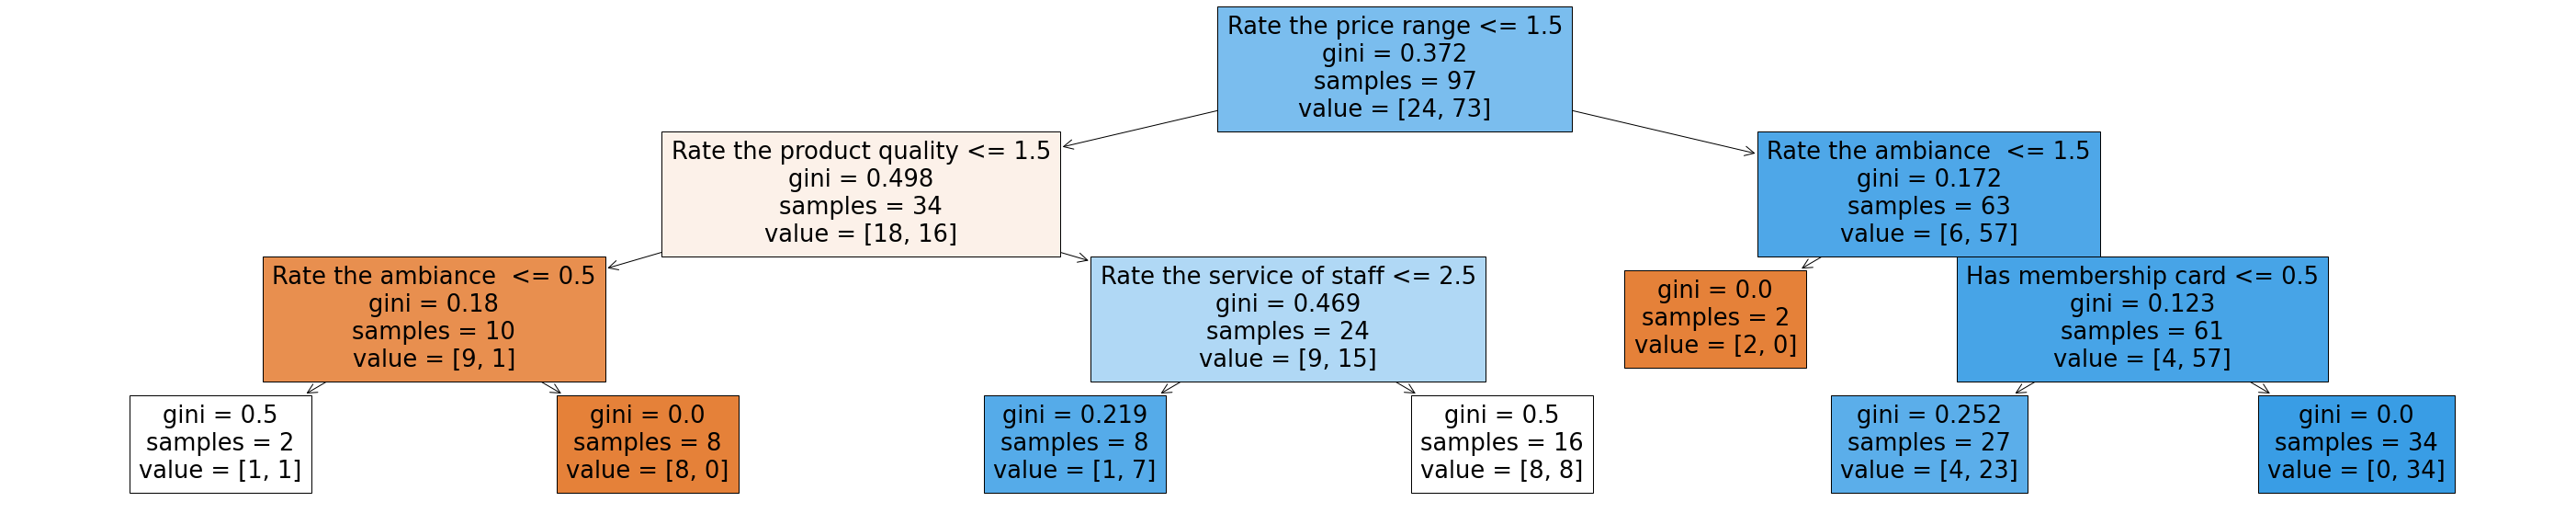

In [142]:
# visualize tree using matplotlib
plt.figure(figsize=(50,10))

tree.plot_tree(clf_gini.fit(X_train, y_train), feature_names = X_train.columns, filled=True)

plt.show()

## Solution

In [103]:
# Import the dataset again
df = pd.read_csv('Starbucks satisfactory survey_modified.csv')

# Drop the columns
df = df.drop(columns=['Timestamp','Gender', 'Age'])

In [104]:
df

,Has membership card,Rate the product quality,Rate the price range,Rate the ambiance,Rate the service of staff,Continue to buy?
0,1,4,3,5,4,Yes
1,1,4,3,4,5,Yes
2,1,4,3,4,4,Yes
3,0,2,1,3,3,No
4,0,3,3,2,3,Yes
...,...,...,...,...,...,...
117,1,3,3,3,4,Yes
118,1,5,5,5,5,Yes
119,0,3,2,3,3,No
120,0,4,4,4,4,Yes


In [105]:
# Separate the dataset into two DataFrames based on the class label
df_majority = df[df['Continue to buy?'] == "No"]
df_minority = df[df['Continue to buy?'] == "Yes"]

In [106]:
# Randomly sample the minority class with replacement to match the majority class size
df_minority_oversampled = df_minority.sample(n=len(df_majority), replace=True)

# Concatenate the oversampled minority class DataFrame with the majority class DataFrame
df_balanced = pd.concat([df_majority, df_minority_oversampled], ignore_index=True)

# shuffle the DataFrame
df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

In [107]:
# Split the dataset into training and testing sets
x = df.drop(columns=['Continue to buy?'])

y = df['Continue to buy?']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [108]:
# Train the model with the balanced dataset
clf_gini.fit(X_train, y_train)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [109]:
# Make predictions
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

In [110]:
print('Gini criterion')
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

print('\nEntropy criterion')
print('Training set score: {:.4f}'.format(clf_entropy.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_entropy.score(X_test, y_test)))

Gini criterion
Training set score: 0.8557
Test set score: 0.8400

Entropy criterion
Training set score: 0.8557
Test set score: 0.8400


In [111]:
# Calculate the confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
cm_entropy = confusion_matrix(y_test, y_pred_entropy)

print('Confusion matrix with criterion gini index: \n', cm_gini)
print('Confusion matrix with criterion entropy: \n', cm_entropy)

Confusion matrix with criterion gini index: 
 [[ 2  2]
 [ 2 19]]
Confusion matrix with criterion entropy: 
 [[ 2  2]
 [ 2 19]]


In [112]:
# Calculate the classification report
print('Classification report with criterion gini index: \n', classification_report(y_test, y_pred_gini, zero_division=1))
print('Classification report with criterion entropy: \n', classification_report(y_test, y_pred_entropy, zero_division=1))

Classification report with criterion gini index: 
               precision    recall  f1-score   support

          No       0.50      0.50      0.50         4
         Yes       0.90      0.90      0.90        21

    accuracy                           0.84        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.84      0.84      0.84        25

Classification report with criterion entropy: 
               precision    recall  f1-score   support

          No       0.50      0.50      0.50         4
         Yes       0.90      0.90      0.90        21

    accuracy                           0.84        25
   macro avg       0.70      0.70      0.70        25
weighted avg       0.84      0.84      0.84        25



## Visualize the Decision Tree

In [113]:
import matplotlib.pyplot as plt 
from sklearn import tree

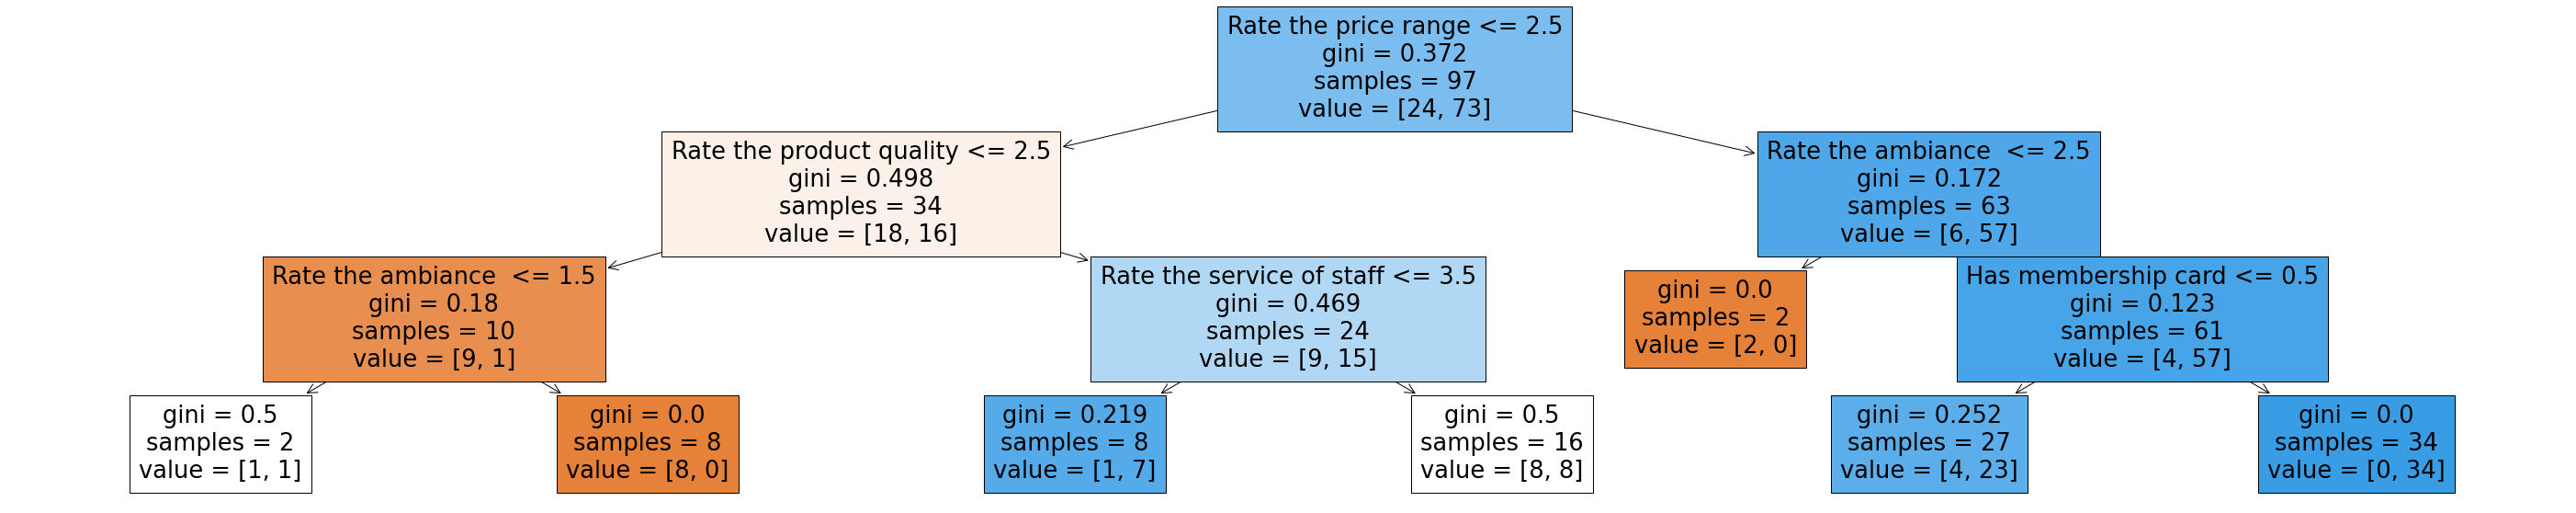

In [114]:
# visualize tree using matplotlib
plt.figure(figsize=(50,10))

tree.plot_tree(clf_gini.fit(X_train, y_train), feature_names = X_train.columns, filled=True)

plt.show()

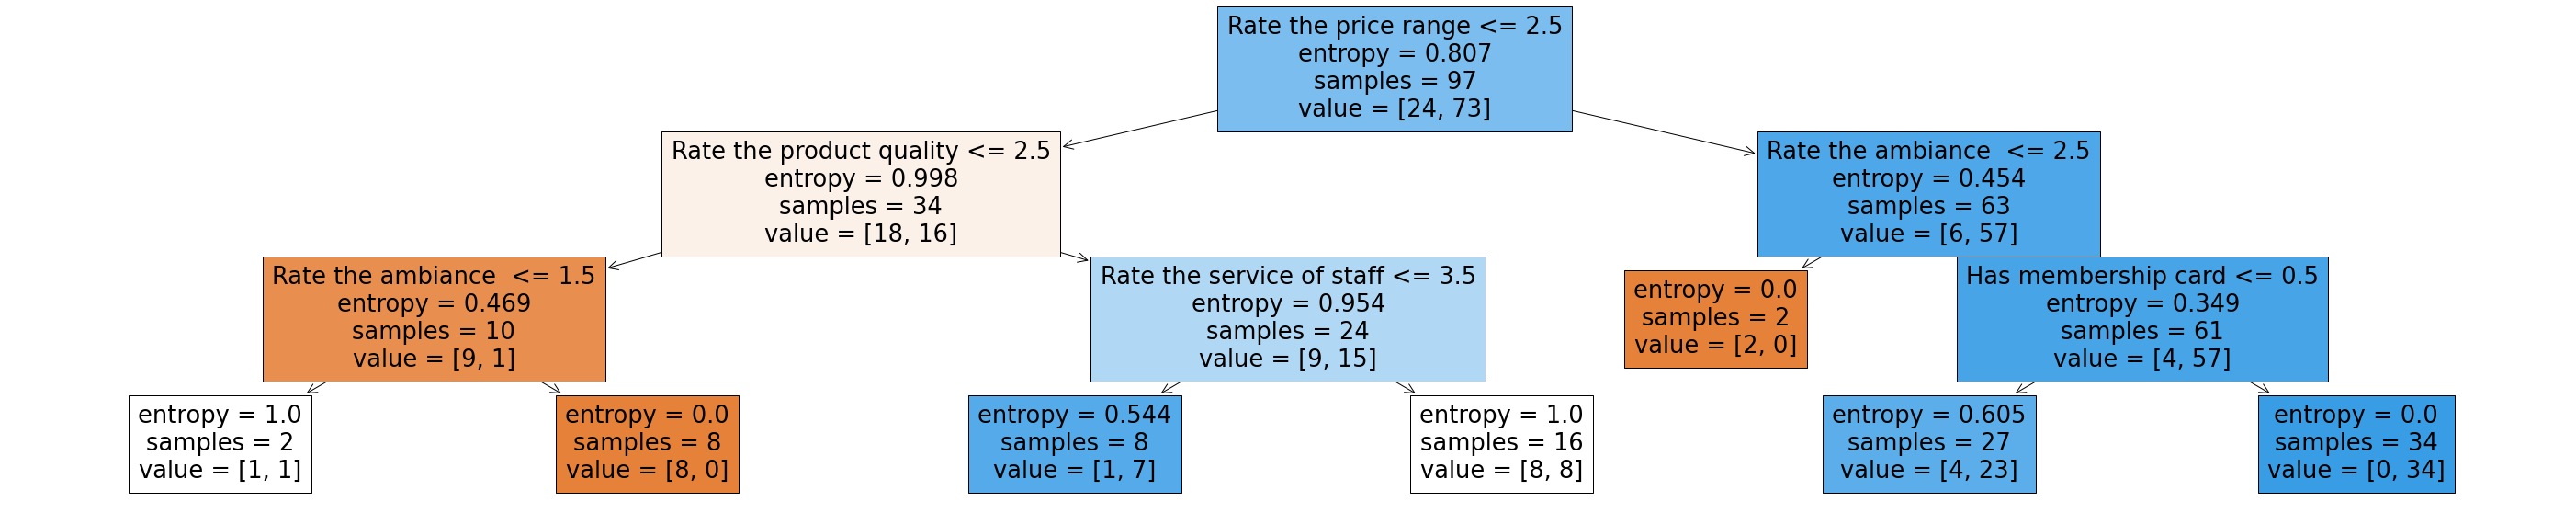

In [115]:
# visualize tree using matplotlib
plt.figure(figsize=(50,10))

tree.plot_tree(clf_entropy.fit(X_train, y_train), feature_names = X_train.columns, filled=True)

plt.show()